In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
interval = np.linspace(0, 360, 13).astype(dtype=np.int64)
print(interval)



def calculate_mean_and_std(index):
    filename = 'acc' + str(index) + '.csv'
    column_names = ['Time', 'ax', 'ay', 'az', 'temp', 'gx', 'gy', 'gz']
    df = pd.read_csv(filename, names=column_names)
    mean_x = df.loc[:, 'ax'].mean()
    mean_y = df.loc[:, 'ay'].mean()
    mean_z = df.loc[:, 'az'].mean()
    std_x = df.loc[:, 'ax'].std()
    std_y = df.loc[:, 'ay'].std()
    std_z = df.loc[:, 'az'].std()
    return pd.DataFrame({'theta':[index], 'mean_x':[mean_x], 'mean_y':[mean_y], 'mean_z':[mean_z], 'std_x':[std_x], 'std_y':[std_y], 'std_z':[std_z]})


output = pd.DataFrame()
for index in interval:
    output = pd.concat([output, calculate_mean_and_std(index)])

print(output)


[  0  30  60  90 120 150 180 210 240 270 300 330 360]
   theta        mean_x        mean_y       mean_z       std_x       std_y  \
0      0 -16786.249100    504.655615   710.866570  857.486577  345.026404   
0     30 -15442.359941  -6448.998479   741.362782  180.471045  296.114656   
0     60  -9104.704474 -13767.143855   493.102944  437.688391  494.262029   
0     90  -1179.097890 -16227.476372   396.088191  524.883453  198.369315   
0    120   7314.011970 -14279.625117   235.675455  517.303620  153.415452   
0    150  12876.110839  -9369.296760   150.682947  373.129029  327.368395   
0    180  15883.326161   -951.087983   167.181553  214.084150  580.026639   
0    210  13742.650700   8356.312544   448.326456  151.950632  625.958654   
0    240   9435.147567  13253.140502   670.275249  378.655686  427.536776   
0    270    919.051230  16527.858494   746.361951  619.973019  241.845693   
0    300  -9514.100964  13834.630518  1037.227587  745.422977  204.111064   
0    330 -14436.061886

    theta    axis         value
0       0  mean_x -16786.249100
1      30  mean_x -15442.359941
2      60  mean_x  -9104.704474
3      90  mean_x  -1179.097890
4     120  mean_x   7314.011970
5     150  mean_x  12876.110839
6     180  mean_x  15883.326161
7     210  mean_x  13742.650700
8     240  mean_x   9435.147567
9     270  mean_x    919.051230
10    300  mean_x  -9514.100964
11    330  mean_x -14436.061886
12    360  mean_x -16832.333905
13      0  mean_y    504.655615
14     30  mean_y  -6448.998479
15     60  mean_y -13767.143855
16     90  mean_y -16227.476372
17    120  mean_y -14279.625117
18    150  mean_y  -9369.296760
19    180  mean_y   -951.087983
20    210  mean_y   8356.312544
21    240  mean_y  13253.140502
22    270  mean_y  16527.858494
23    300  mean_y  13834.630518
24    330  mean_y   8737.589809
25    360  mean_y    610.483965
26      0  mean_z    710.866570
27     30  mean_z    741.362782
28     60  mean_z    493.102944
29     90  mean_z    396.088191
30    12

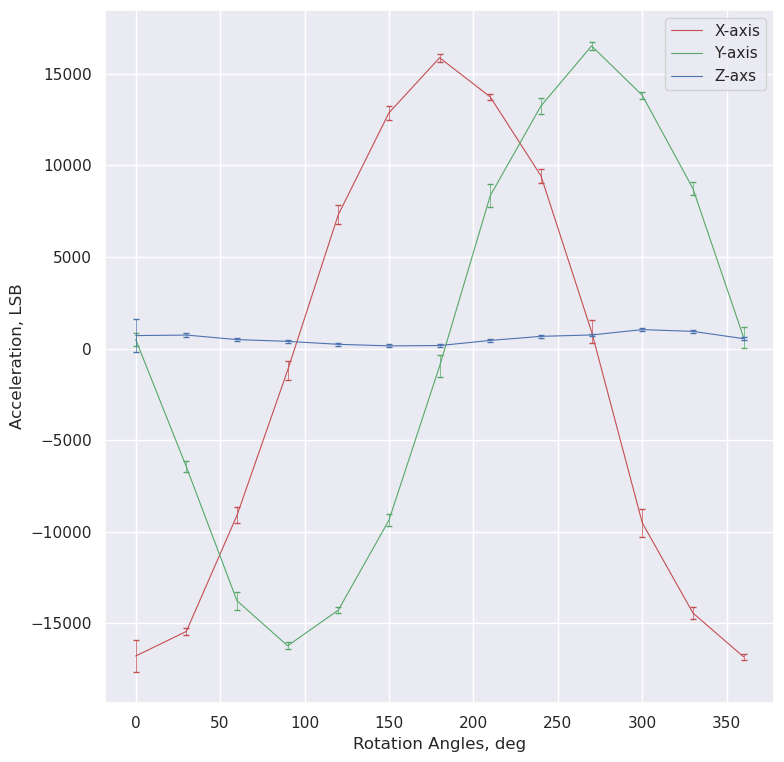

In [6]:
melted_output = output.drop(output.columns[-3:], axis=1)
melted_output = melted_output.melt(id_vars='theta', value_vars=melted_output.columns[1:], var_name='axis', value_name='value')
print(melted_output)

sns.set()
sns.set_style('darkgrid')
sns.set_palette('husl')
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(output['theta'], output['mean_x'], c='r', linewidth=.8, label='X-axis')
ax.errorbar(output['theta'], output['mean_x'], yerr=output['std_x'], fmt='none', c='r', capsize=2, elinewidth=0.5)
ax.plot(output['theta'], output['mean_y'], c='g', linewidth=.8, label='Y-axis')
ax.errorbar(output['theta'], output['mean_y'], yerr=output['std_y'], fmt='none', c='g', capsize=2, elinewidth=0.5)
ax.plot(output['theta'], output['mean_z'], c='b', linewidth=.8, label='Z-axs')
ax.errorbar(output['theta'], output['mean_z'], yerr=output['std_z'], fmt='none', c='b', capsize=2, elinewidth=0.5)
ax.set_xlabel('Rotation Angles, deg')
ax.set_ylabel('Acceleration, LSB')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.legend()
plt.show()

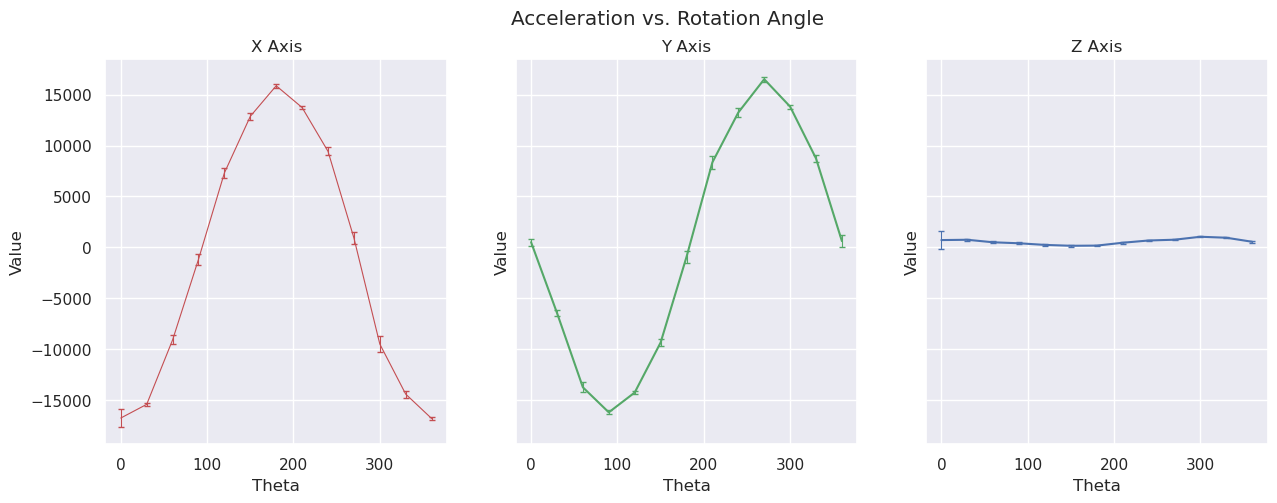

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Acceleration vs. Rotation Angle')

# X axis
axes[0].plot(output['theta'], output['mean_x'], c='r', linewidth=.8)
# axes[0].scatter(output['theta'], output['mean_x'], c='r')
axes[0].errorbar(output['theta'], output['mean_x'], yerr=output['std_x'], fmt='none', c='r', capsize=2, elinewidth=0.8)
axes[0].set_title('X Axis')
axes[0].set_ylabel('Value')
axes[0].set_xlabel('Theta')

axes[1].plot(output['theta'], output['mean_y'], c='g')
# axes[1].scatter(output['theta'], output['mean_y'], c='g')
axes[1].errorbar(output['theta'], output['mean_y'], yerr=output['std_y'], fmt='none', c='g', capsize=2, elinewidth=0.8)
axes[1].set_title('Y Axis')
axes[1].set_ylabel('Value')
axes[1].set_xlabel('Theta')

axes[2].plot(output['theta'], output['mean_z'], c='b')
# axes[2].scatter(output['theta'], output['mean_z'], c='b')
axes[2].errorbar(output['theta'], output['mean_z'], yerr=output['std_z'], fmt='none', c='b', capsize=2, elinewidth=0.8)
axes[2].set_title('Z Axis')
axes[2].set_ylabel('Value')
axes[2].set_xlabel('Theta')

# sns.scatterplot(ax=axes[1], x=output['theta'], y=output['mean_y'])
# sns.regplot(ax=axes[1], x=output['theta'], y=output['mean_y'])
# axes[0].set_title('Y axis')

# sns.scatterplot(ax=axes[2], x=output['theta'], y=output['mean_z'])
# sns.regplot(ax=axes[2], x=output['theta'], y=output['mean_z'])
# axes[0].set_title('Z axis')

plt.show()

In [8]:
meanx_diff = output['mean_x'].max() - output['mean_x'].min()
meany_diff = output['mean_y'].max() - output['mean_y'].min()
scale_factorx = np.around(meanx_diff / (2 * 9.80665), decimals=10)
scale_factory = np.around(meany_diff / (2 * 9.80665), decimals=10)
print(f'{scale_factorx:.2f}')
print(f'{scale_factory:.2f}')


1668.03
1670.06
